In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
prices = pd.read_csv("../data/prices.csv")
capacity = pd.read_csv("../data/Monthly_Generating_Capacity_EIA_allSources_LOCALITIES.csv")
ucap = pd.read_csv("../data/Monthly_UCAP_Requirements.csv")

prices['Date'] = pd.to_datetime(prices['Date'], format='%b-%y')
capacity['Date'] = pd.to_datetime(capacity['Date'])
ucap['Date'] = pd.to_datetime(ucap['Date'])

In [4]:
prices.head()

,Date,NYCA,GHIJ,NYC,LI
0,2023-05-01,4.90,5.24,17.75,7.05
1,2023-04-01,1.00,1.10,1.10,1.65
2,2023-03-01,2.17,2.17,2.17,2.17
3,2023-02-01,4.00,4.00,4.00,4.00
4,2023-01-01,2.69,2.69,2.69,2.87


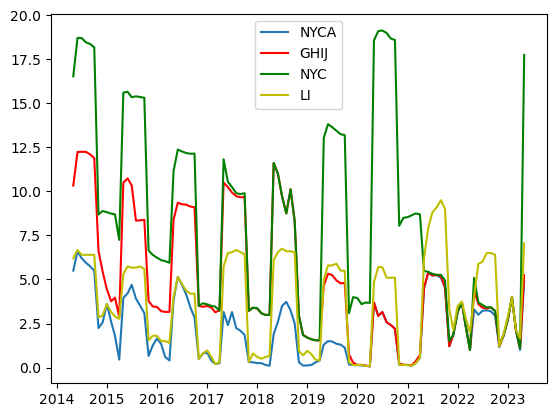

In [5]:
plt.plot(prices['Date'],prices['NYCA'],'-',label='NYCA')
plt.plot(prices['Date'],prices['GHIJ'],'r-',label='GHIJ')
plt.plot(prices['Date'],prices['NYC'],'g-',label='NYC')
plt.plot(prices['Date'],prices['LI'],'y-',label='LI')
plt.legend()

In [6]:
capacity.head()

,Date,Capacity Gas (LI),Capacity Coal (LI),Capacity Oil (LI),Capacity Renewables (LI),Capacity Others (LI),Capacity Gas (NYC),Capacity Coal (NYC),Capacity Oil (NYC),Capacity Renewables (NYC),...,Capacity Gas (GJ),Capacity Coal (GJ),Capacity Oil (GJ),Capacity Renewables (GJ),Capacity Others (GJ),Capacity Gas (NYCA),Capacity Coal (NYCA),Capacity Oil (NYCA),Capacity Renewables (NYCA),Capacity Others (NYCA)
0,2017-01-01,4106.2,0.0,1338.9,199.3,0.0,9139.6,0.0,625.4,1.0,...,4452.2,0.0,49.3,105.3,2311.0,5260.8,1206.5,1819.2,8071.3,3417.1
1,2017-02-01,4106.2,0.0,1338.9,199.3,0.0,9072.6,0.0,492.6,1.0,...,4452.2,0.0,49.3,105.3,2311.0,5148.8,1318.5,1819.2,8081.7,3417.1
2,2017-03-01,4106.2,0.0,1338.9,199.3,0.0,9074.4,0.0,492.6,1.0,...,4452.2,0.0,49.3,105.3,2311.0,5260.8,1110.5,1819.2,8081.7,3417.1
3,2017-04-01,4106.2,0.0,1338.9,199.3,0.0,9082.1,0.0,503.3,1.0,...,4452.2,0.0,49.3,105.3,2311.0,5260.8,1110.5,1819.2,8087.5,3417.1
4,2017-05-01,4106.2,0.0,1338.9,199.3,0.0,9082.1,0.0,503.3,1.0,...,4473.8,0.0,27.7,105.3,2311.0,5260.8,1110.5,1819.2,8089.5,3417.1


In [27]:
capacity.columns = [x.replace("Capacity ", "") for x in capacity.columns.to_list()]
capacity['Sum'] = capacity.sum(axis=1)
capacity.head()

C:\Users\hantk\AppData\Local\Temp\ipykernel_8832\94139296.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  capacity['Sum'] = capacity.sum(axis=1)


,Date,Gas (LI),Coal (LI),Oil (LI),Renewables (LI),Others (LI),Gas (NYC),Coal (NYC),Oil (NYC),Renewables (NYC),...,Coal (GJ),Oil (GJ),Renewables (GJ),Others (GJ),Gas (NYCA),Coal (NYCA),Oil (NYCA),Renewables (NYCA),Others (NYCA),Sum
0,2017-01-01,4106.2,0.0,1338.9,199.3,0.0,9139.6,0.0,625.4,1.0,...,0.0,49.3,105.3,2311.0,5260.8,1206.5,1819.2,8071.3,3417.1,42103.1
1,2017-02-01,4106.2,0.0,1338.9,199.3,0.0,9072.6,0.0,492.6,1.0,...,0.0,49.3,105.3,2311.0,5148.8,1318.5,1819.2,8081.7,3417.1,41913.7
2,2017-03-01,4106.2,0.0,1338.9,199.3,0.0,9074.4,0.0,492.6,1.0,...,0.0,49.3,105.3,2311.0,5260.8,1110.5,1819.2,8081.7,3417.1,41819.5
3,2017-04-01,4106.2,0.0,1338.9,199.3,0.0,9082.1,0.0,503.3,1.0,...,0.0,49.3,105.3,2311.0,5260.8,1110.5,1819.2,8087.5,3417.1,41843.7
4,2017-05-01,4106.2,0.0,1338.9,199.3,0.0,9082.1,0.0,503.3,1.0,...,0.0,27.7,105.3,2311.0,5260.8,1110.5,1819.2,8089.5,3417.1,41845.7


In [28]:
ucap.columns = [x.replace(" (MW)", "") for x in ucap.columns.to_list()]
ucap.head()

,Date,UCAP NYCA,UCAP GJ,UCAP NYC,UCAP LI
0,2014-08-01,35812.4,13494.9,9470.5,5430.5
1,2014-09-01,35812.4,13494.9,9470.5,5430.5
2,2014-10-01,35812.4,13494.9,9470.5,5430.5
3,2014-11-01,36505.6,13582.3,9508.6,5393.5
4,2014-12-01,36505.6,13582.3,9508.6,5393.5


In [29]:
df = prices.set_index("Date").join(capacity.set_index("Date"))
df = df.dropna()

In [30]:
df.head()

,NYCA,GHIJ,NYC,LI,Gas (LI),Coal (LI),Oil (LI),Renewables (LI),Others (LI),Gas (NYC),...,Coal (GJ),Oil (GJ),Renewables (GJ),Others (GJ),Gas (NYCA),Coal (NYCA),Oil (NYCA),Renewables (NYCA),Others (NYCA),Sum
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-01,2.17,2.17,2.17,2.17,4009.5,0.0,1311.0,288.2,10.0,8835.9,...,0.0,94.4,268.2,27.3,5370.8,120.4,1821.7,9478.3,3513.1,42145.9
2023-02-01,4.00,4.00,4.00,4.00,4009.5,0.0,1311.0,288.2,10.0,8825.9,...,0.0,93.0,261.5,27.3,5370.8,775.5,1821.7,9378.0,3503.1,42673.8
2023-01-01,2.69,2.69,2.69,2.87,4009.5,0.0,1311.0,288.2,10.0,8869.3,...,0.0,94.6,256.5,27.3,5372.6,930.8,1821.7,9144.0,3503.1,42635.7
2022-12-01,1.80,1.80,1.80,1.88,4009.5,0.0,1311.0,288.2,10.0,8865.8,...,0.0,94.6,235.7,17.3,5372.6,930.8,1821.7,9015.8,3503.1,42470.9
2022-11-01,1.15,1.22,1.39,1.19,4009.5,0.0,1311.0,288.2,10.0,8865.8,...,0.0,94.6,235.7,17.3,5372.6,930.8,1821.7,8985.8,3503.1,42440.9


In [40]:
df2 = df.join(ucap.set_index("Date"))
df2 = df2.dropna()

In [41]:
df2.rename(columns={'NYCA': 'Price (NYCA)', 'NYC': 'Price (NYC)', 'LI': 'Price (LI)', 'GHIJ': 'Price (GJ)'}, inplace=True)
df2.head()

,Price (NYCA),Price (GJ),Price (NYC),Price (LI),Gas (LI),Coal (LI),Oil (LI),Renewables (LI),Others (LI),Gas (NYC),...,Gas (NYCA),Coal (NYCA),Oil (NYCA),Renewables (NYCA),Others (NYCA),Sum,UCAP NYCA,UCAP GJ,UCAP NYC,UCAP LI
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-01,2.17,2.17,2.17,2.17,4009.5,0.0,1311.0,288.2,10.0,8835.9,...,5370.8,120.4,1821.7,9478.3,3513.1,42145.9,34607.8,12707.8,8553.7,4584.8
2023-02-01,4.00,4.00,4.00,4.00,4009.5,0.0,1311.0,288.2,10.0,8825.9,...,5370.8,775.5,1821.7,9378.0,3503.1,42673.8,34607.8,12707.8,8553.7,4584.8
2023-01-01,2.69,2.69,2.69,2.87,4009.5,0.0,1311.0,288.2,10.0,8869.3,...,5372.6,930.8,1821.7,9144.0,3503.1,42635.7,34607.8,12707.8,8553.7,4584.8
2022-12-01,1.80,1.80,1.80,1.88,4009.5,0.0,1311.0,288.2,10.0,8865.8,...,5372.6,930.8,1821.7,9015.8,3503.1,42470.9,34607.8,12707.8,8553.7,4584.8
2022-11-01,1.15,1.22,1.39,1.19,4009.5,0.0,1311.0,288.2,10.0,8865.8,...,5372.6,930.8,1821.7,8985.8,3503.1,42440.9,34607.8,12707.8,8553.7,4584.8


In [46]:
filter_col_LI = [col for col in df2.columns if "LI" in col]
df_LI = df2[filter_col_LI]
df_LI['Sum (LI)'] = df_LI.iloc[:, -6:-1].sum(axis=1)
filter_col_GJ = [col for col in df2.columns if "GJ" in col]
df_GJ = df2[filter_col_GJ]
df_GJ['Sum (GJ)'] = df_GJ.iloc[:, -6:-1].sum(axis=1)
filter_col_NYCA = [col for col in df2.columns if "NYCA" in col]
df_NYCA = df2[filter_col_NYCA]
df_NYCA['Sum (NYCA)'] = df_NYCA.iloc[:, -6:-1].sum(axis=1)
filter_col_NYC = [col for col in df2.columns if "NYC" in col if col not in filter_col_NYCA]
df_NYC = df2[filter_col_NYC]
df_NYC['Sum (NYC)'] = df_NYC.iloc[:, -6:-1].sum(axis=1)
df_LI.head()

C:\Users\hantk\AppData\Local\Temp\ipykernel_8832\1636287802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LI['Sum (LI)'] = df_LI.iloc[:, -6:-1].sum(axis=1)
C:\Users\hantk\AppData\Local\Temp\ipykernel_8832\1636287802.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GJ['Sum (GJ)'] = df_GJ.iloc[:, -6:-1].sum(axis=1)
C:\Users\hantk\AppData\Local\Temp\ipykernel_8832\1636287802.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,Price (LI),Gas (LI),Coal (LI),Oil (LI),Renewables (LI),Others (LI),UCAP LI,Sum (LI)
Date,,,,,,,,
2023-03-01,2.17,4009.5,0.0,1311.0,288.2,10.0,4584.8,5618.7
2023-02-01,4.00,4009.5,0.0,1311.0,288.2,10.0,4584.8,5618.7
2023-01-01,2.87,4009.5,0.0,1311.0,288.2,10.0,4584.8,5618.7
2022-12-01,1.88,4009.5,0.0,1311.0,288.2,10.0,4584.8,5618.7
2022-11-01,1.19,4009.5,0.0,1311.0,288.2,10.0,4584.8,5618.7


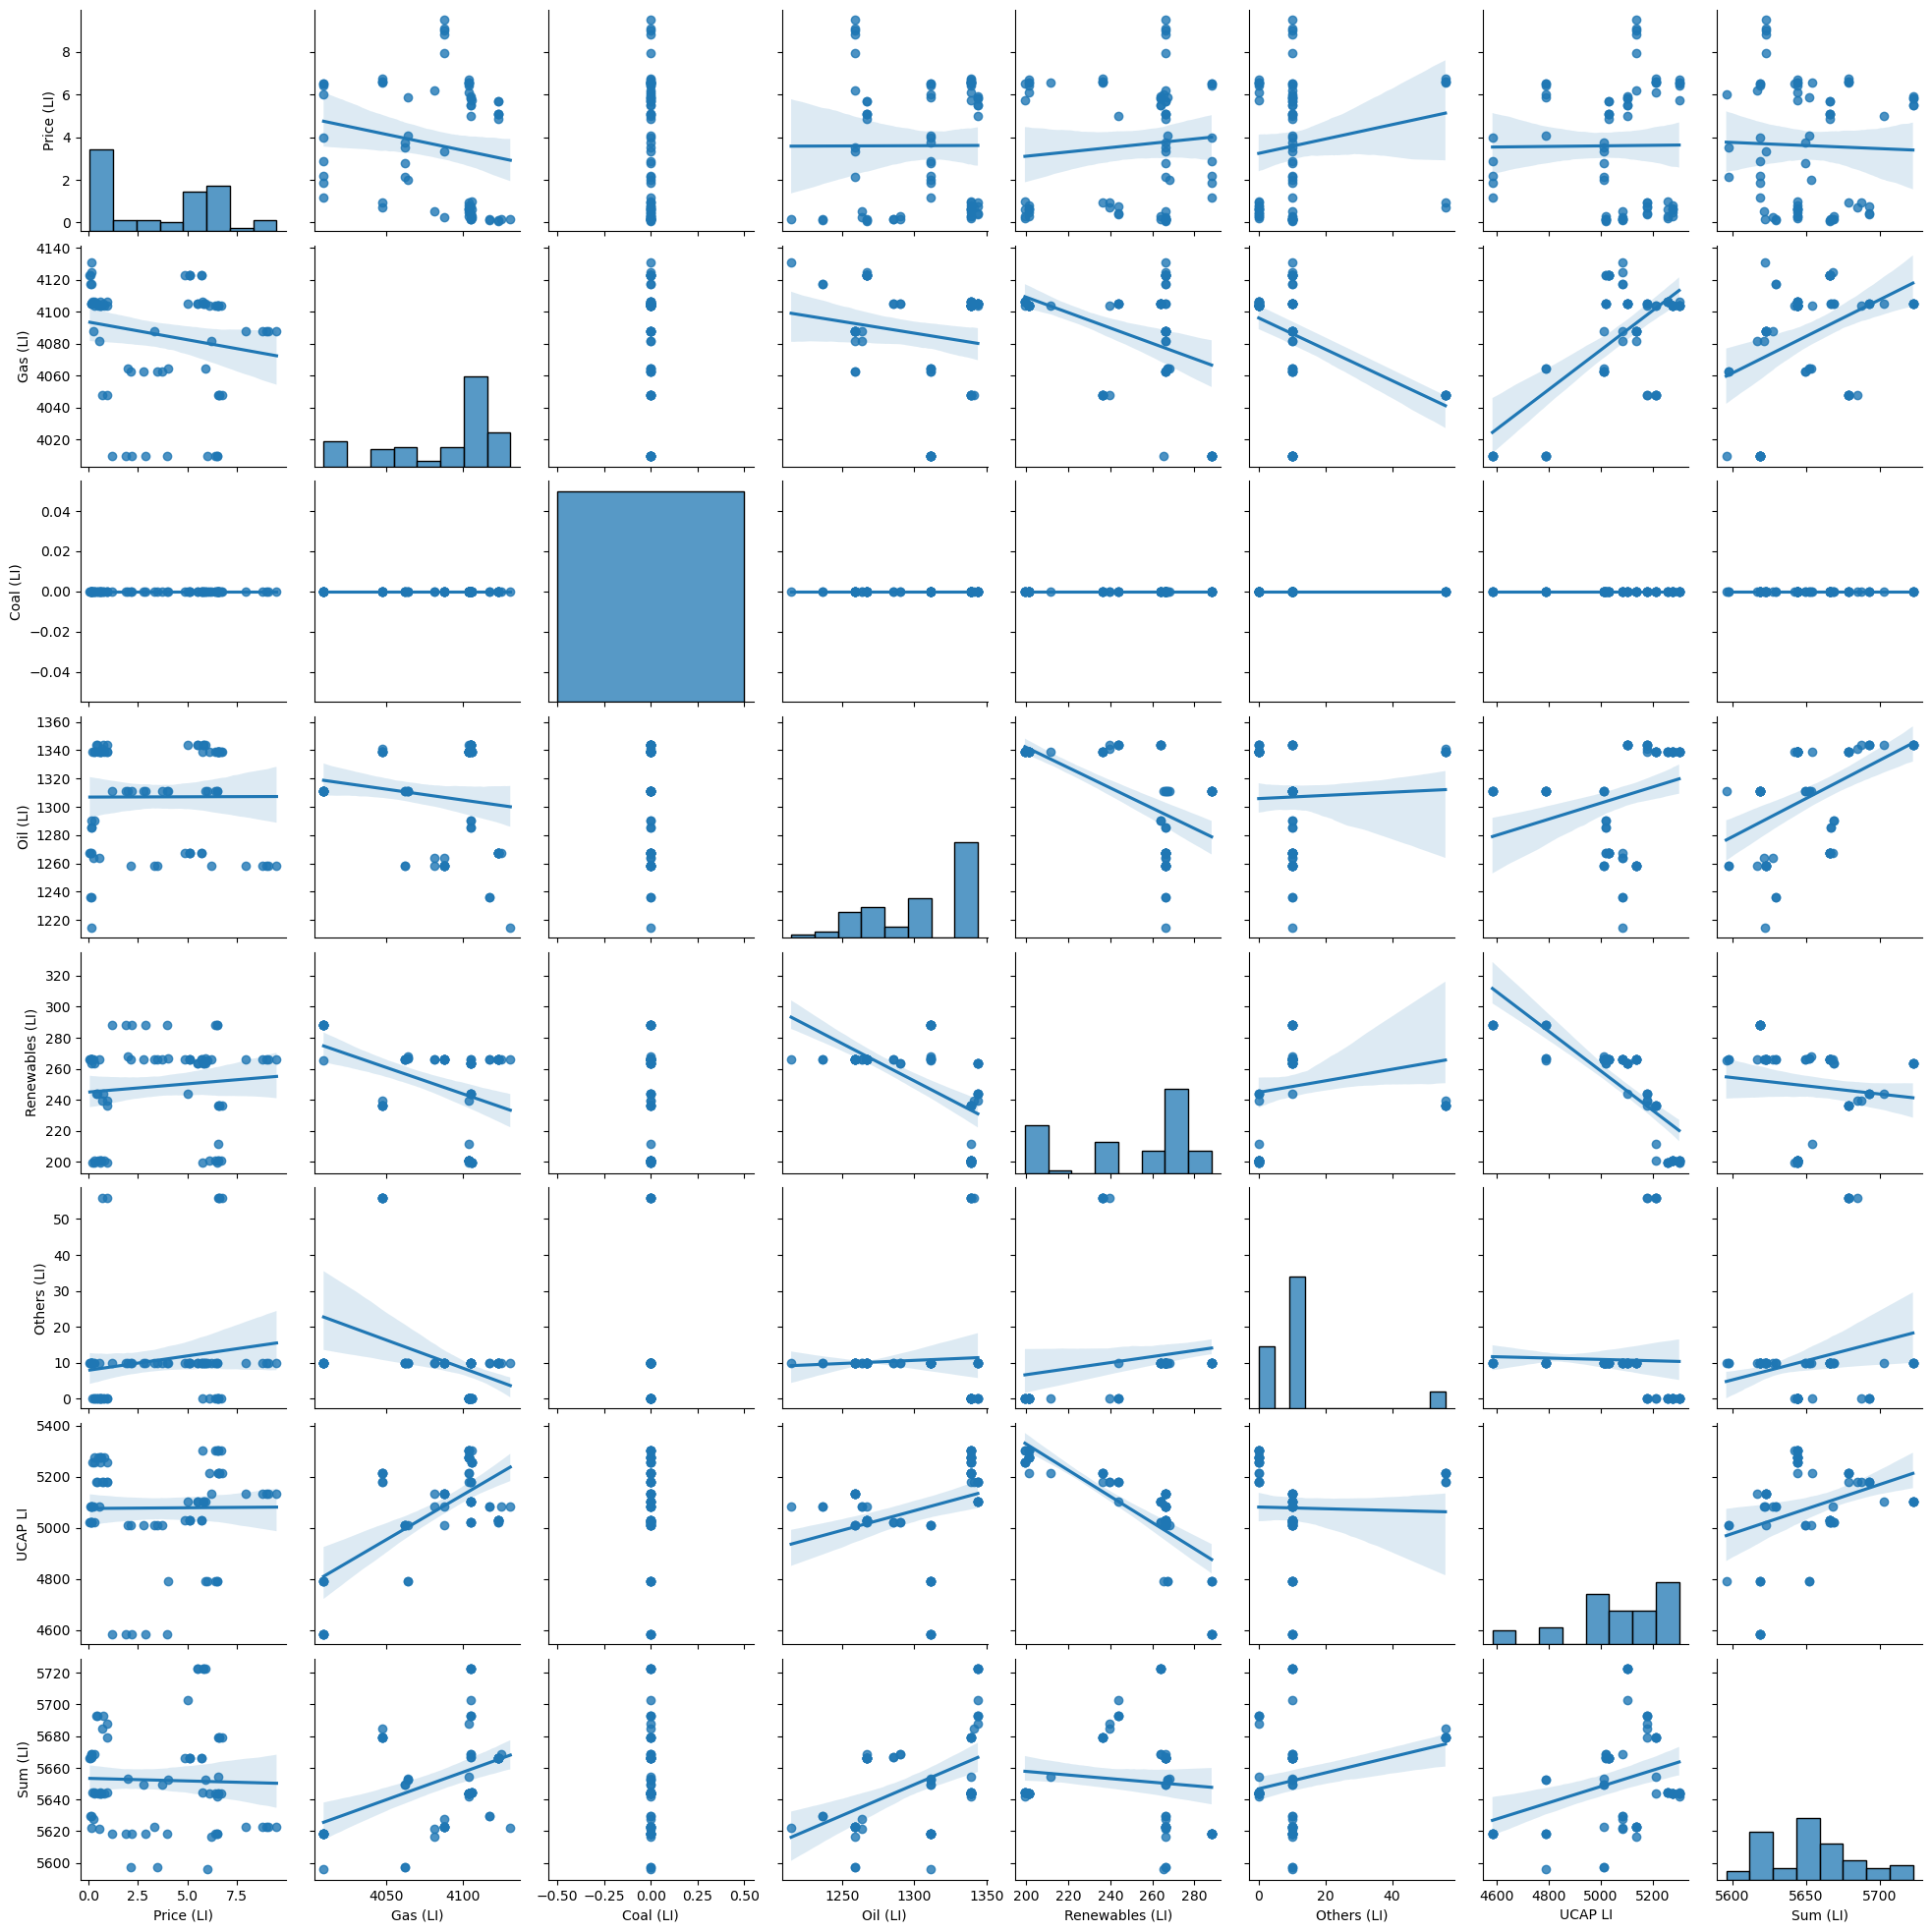

In [47]:
sns.pairplot(df_LI, kind='reg')

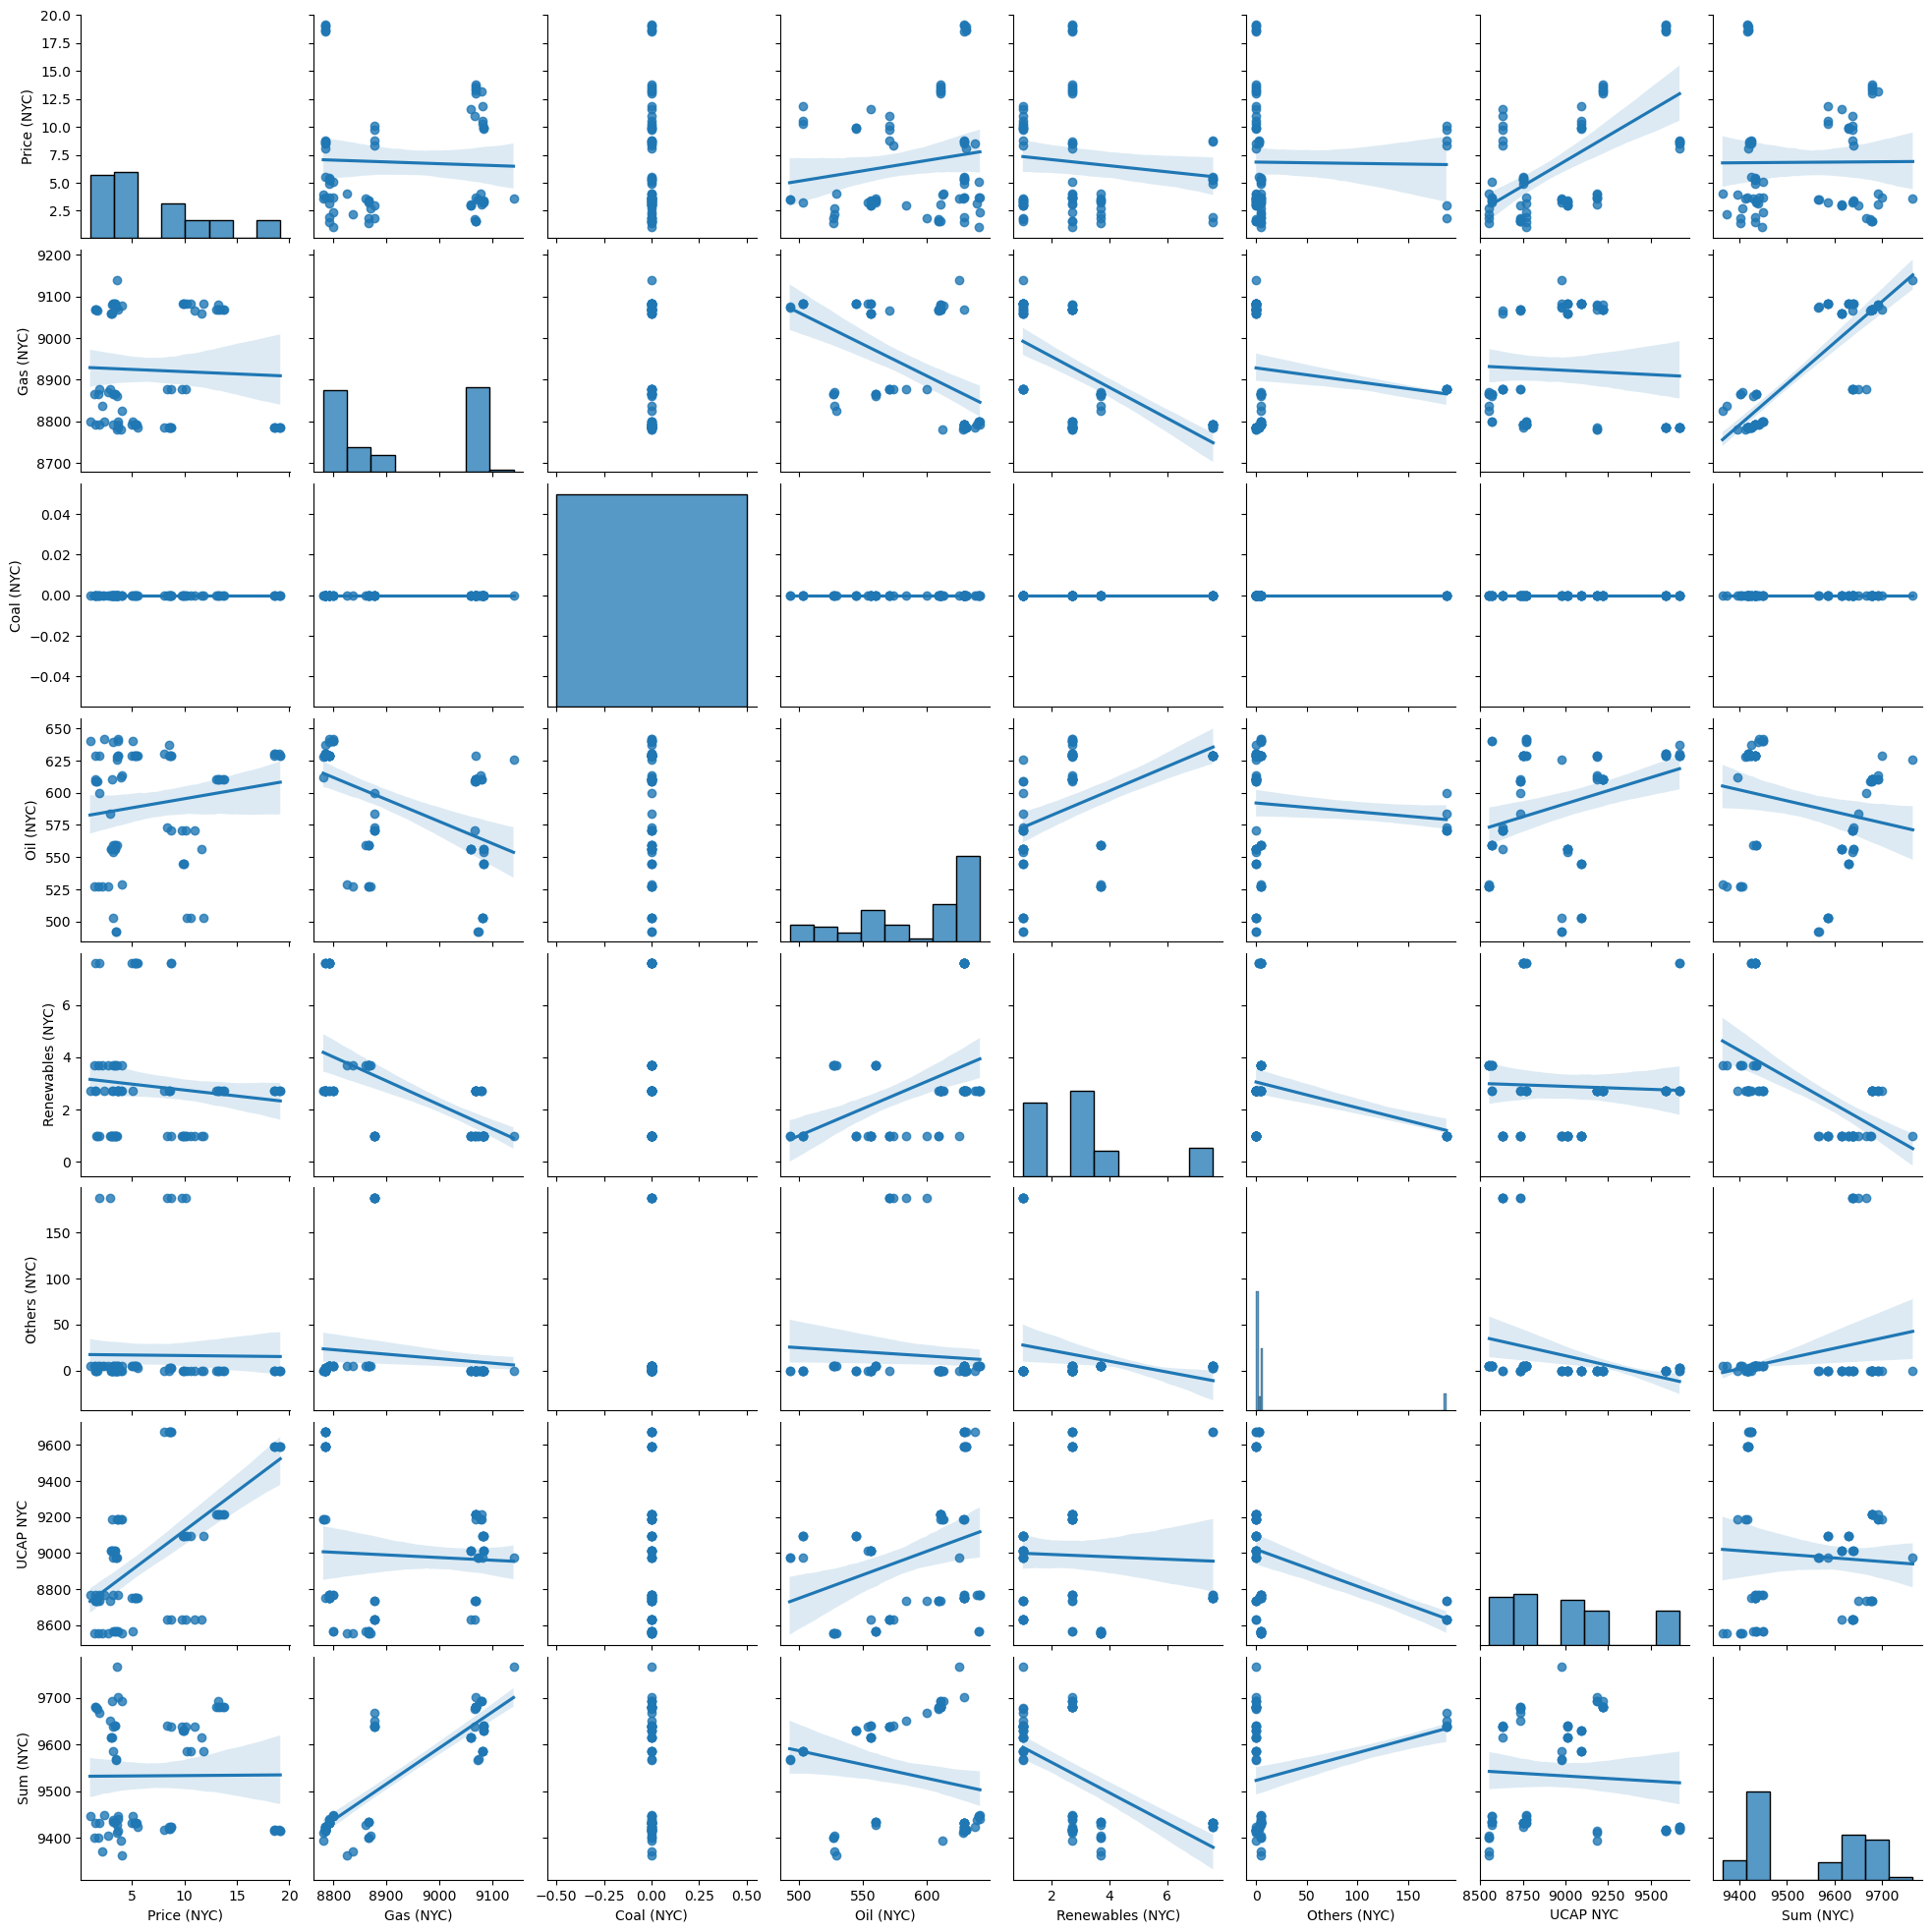

In [48]:
sns.pairplot(df_NYC, kind='reg')

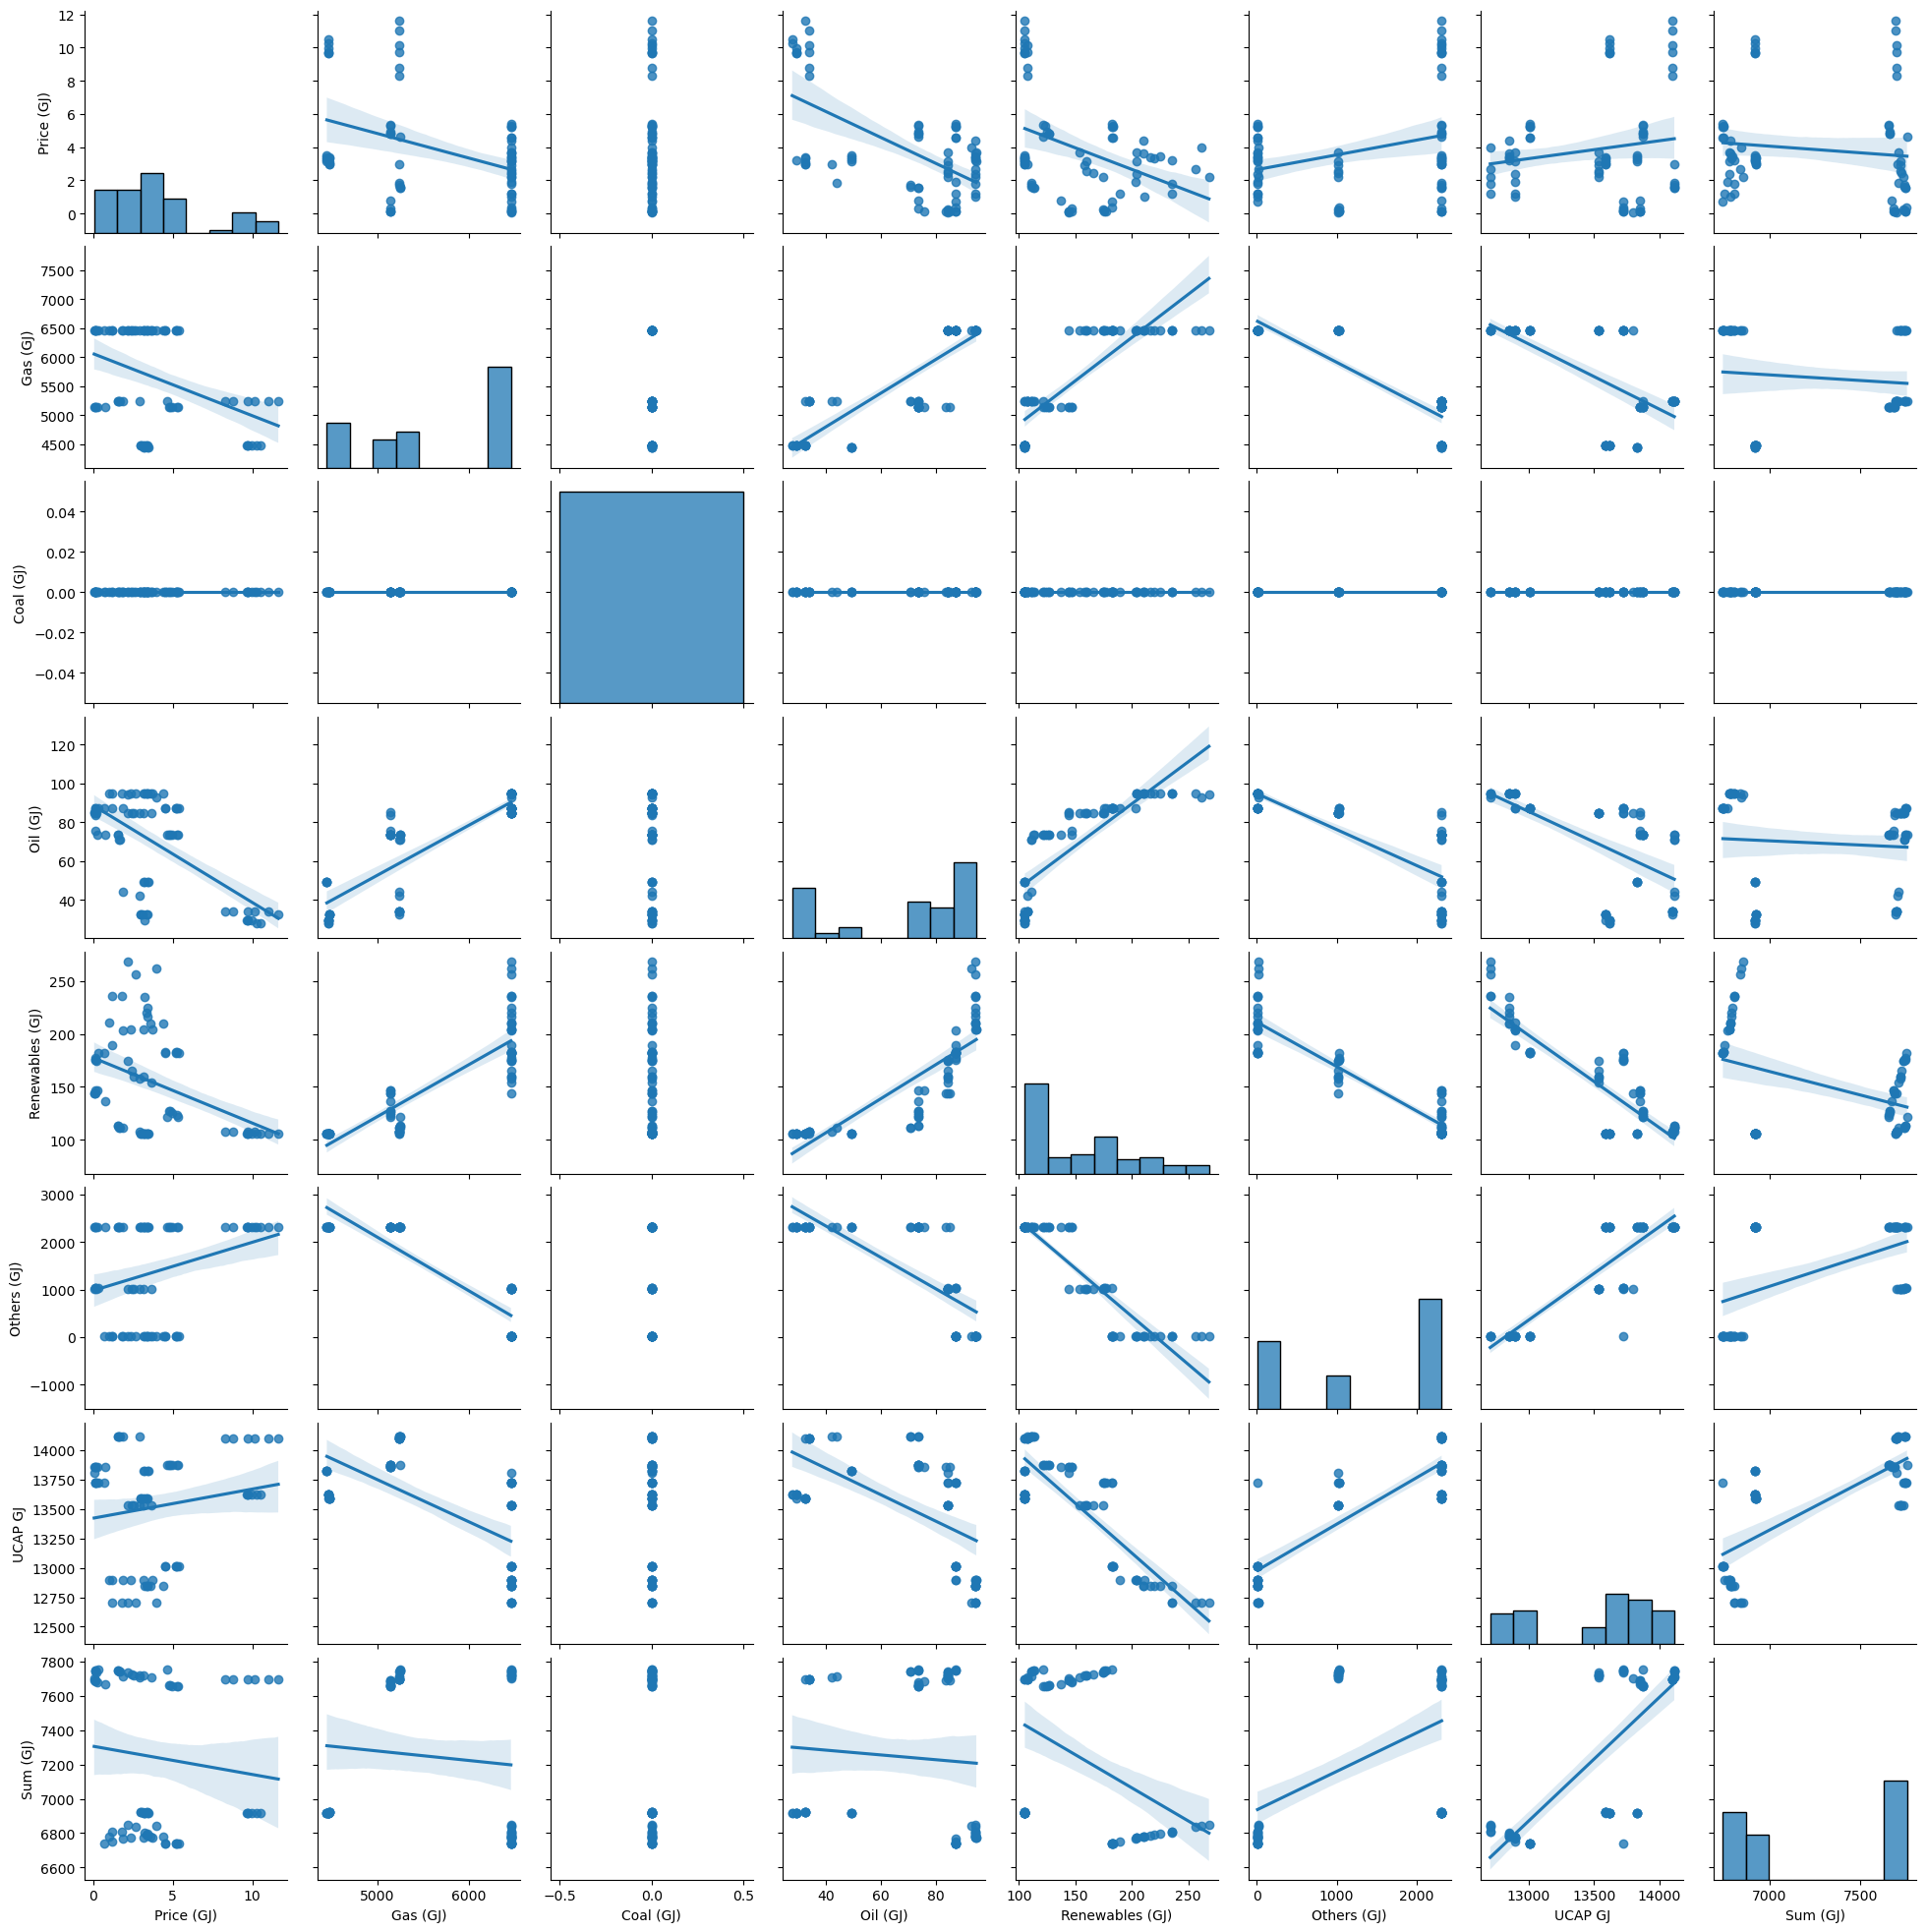

In [50]:
sns.pairplot(df_GJ, kind='reg')

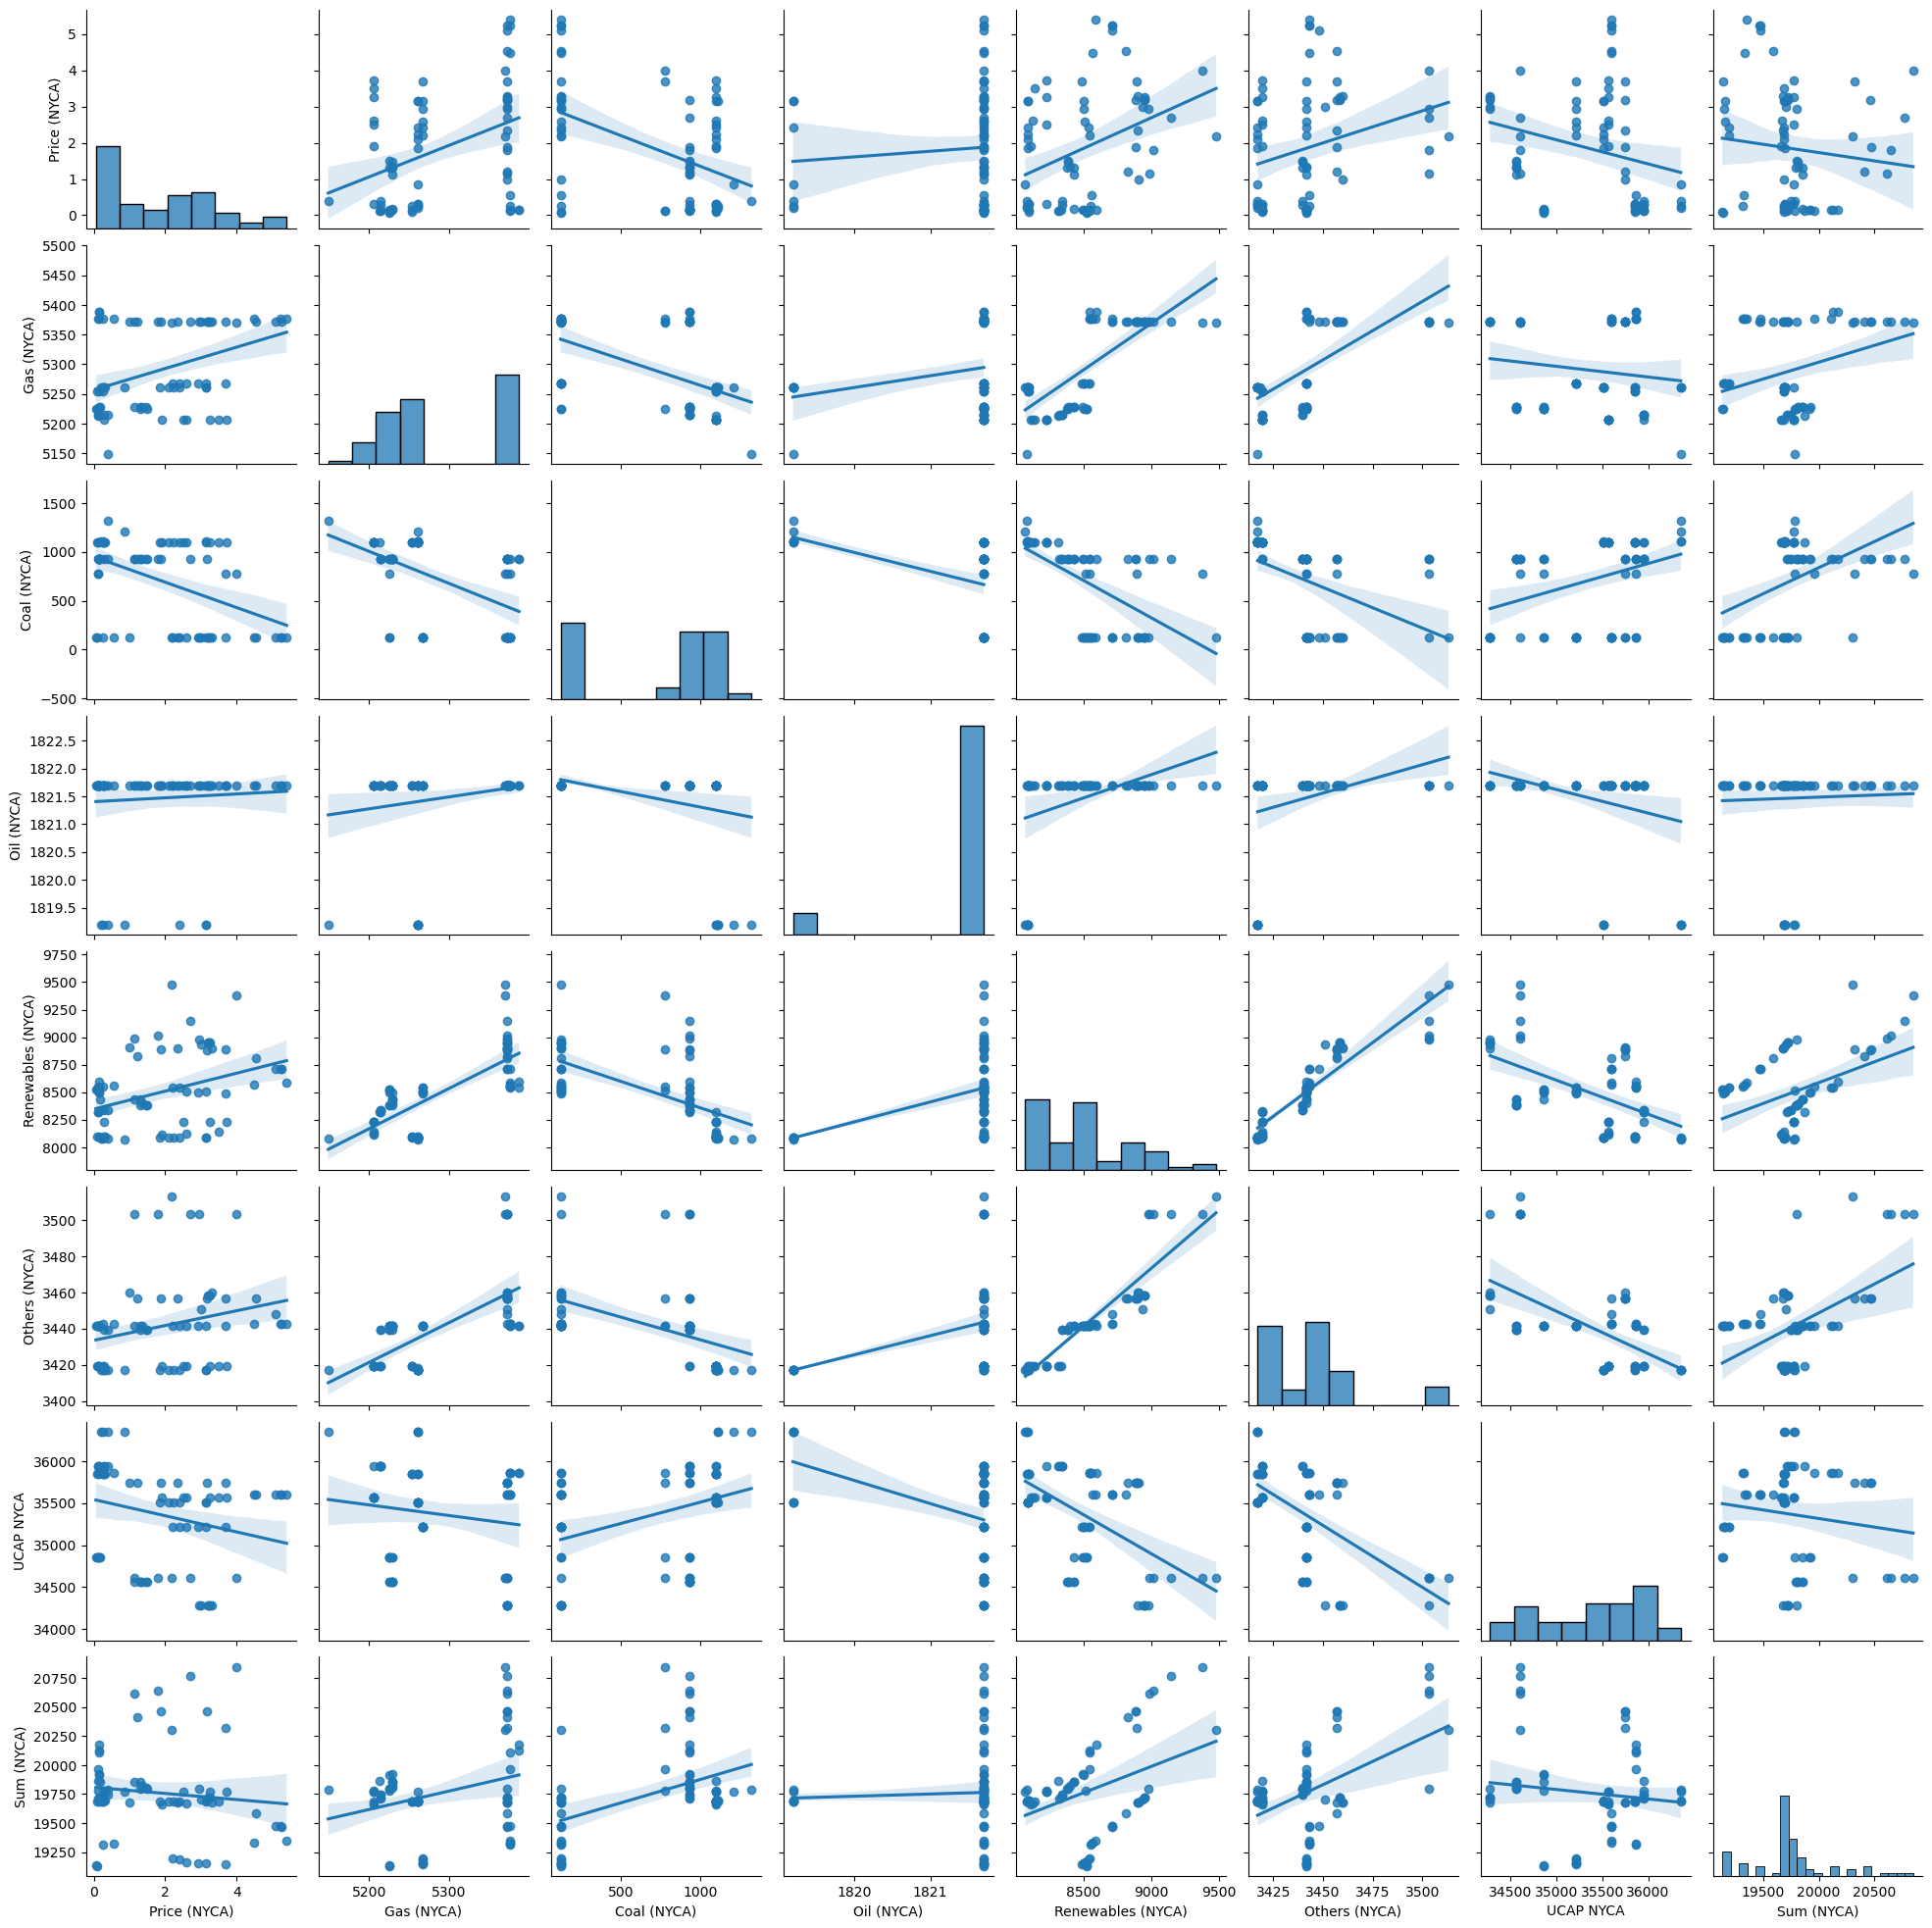

In [49]:
sns.pairplot(df_NYCA, kind='reg')